In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [204]:
water=pd.read_csv('water_potability.csv')

In [205]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [206]:
water.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
42,7.145772,238.689929,28780.340432,6.814029,385.975650,332.032706,11.093163,66.138045,5.182591,0
187,8.661592,284.098352,27088.476460,7.897857,NaN,512.277310,16.912142,72.465763,3.670431,0
1238,6.582500,200.733107,23720.481730,8.565832,353.008115,458.362733,13.001881,79.529338,4.152014,0
2652,8.303831,222.950037,26030.618514,7.108974,NaN,368.284494,14.383585,70.072700,3.392657,0
827,NaN,191.554815,22462.113287,8.186258,NaN,349.954534,17.247307,76.767797,5.260301,0


In [207]:
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [208]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [209]:
water['Potability']=water.Potability.astype('Float64')

In [210]:
water.Potability.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3276 entries, 0 to 3275
Series name: Potability
Non-Null Count  Dtype  
--------------  -----  
3276 non-null   Float64
dtypes: Float64(1)
memory usage: 28.9 KB


In [211]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [212]:
water.dropna(inplace=True)
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [213]:
water.shape

(2011, 10)

In [214]:
water.agg(['min','max'])

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.0
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.0


In [215]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.0
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.0
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.0
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.0
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.0
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.0


In [216]:
# def zscore_normalization(df, cols_to_normalize):
#     for col in cols_to_normalize:
#         mean = df[col].mean()
#         std = df[col].std()
#         df[col] = (df[col] - mean) / std
#     return df

In [217]:
cols_to_normalize = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                     'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
water[cols_to_normalize] = water[cols_to_normalize].transform(lambda x: (x - x.mean()) / x.std() if x.name in cols_to_normalize else x)

In [218]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2011.0
mean,-2.208300e-16,4.902427e-17,6.624901e-17,-7.596553e-17,1.978637e-16,7.631886e-16,4.063273e-16,-7.384557e-16,-3.497948e-16,0.403282
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.490678
min,-4.359201e+00,-3.752889e+00,-2.498947e+00,-3.624051e+00,-4.956287e+00,-2.786513e+00,-3.656499e+00,-3.596657e+00,-3.228989e+00,0.0
25%,-6.332188e-01,-5.890328e-01,-7.291832e-01,-6.281112e-01,-6.210910e-01,-7.414719e-01,-6.717691e-01,-6.498802e-01,-6.751022e-01,0.0
50%,-3.730478e-02,3.749854e-02,-1.138511e-01,6.037431e-03,-2.408665e-02,-3.804244e-02,-1.073413e-02,8.791299e-03,-1.988498e-03,0.0
75%,6.146040e-01,6.273309e-01,6.092339e-01,6.154565e-01,6.335584e-01,6.919214e-01,6.993591e-01,6.774269e-01,6.976987e-01,1.0
max,4.394489e+00,3.719005e+00,4.000263e+00,3.781289e+00,3.587073e+00,4.049136e+00,3.804257e+00,3.582680e+00,3.235769e+00,1.0


In [219]:
water.agg(['mean','std'])

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
mean,-2.208300e-16,4.902427e-17,6.624901e-17,-7.596553e-17,1.978637e-16,7.631886e-16,4.063273e-16,-7.384557e-16,-3.497948e-16,0.403282
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.490678


In [220]:
water[cols_to_normalize].mean()

ph                -2.208300e-16
Hardness           4.902427e-17
Solids             6.624901e-17
Chloramines       -7.596553e-17
Sulfate            1.978637e-16
Conductivity       7.631886e-16
Organic_carbon     4.063273e-16
Trihalomethanes   -7.384557e-16
Turbidity         -3.497948e-16
dtype: float64

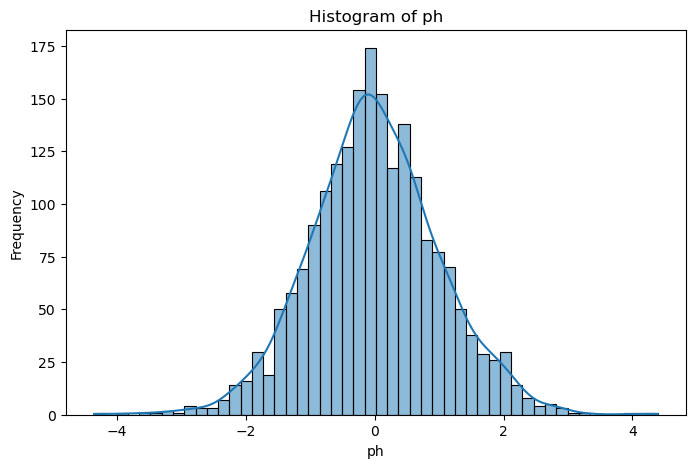

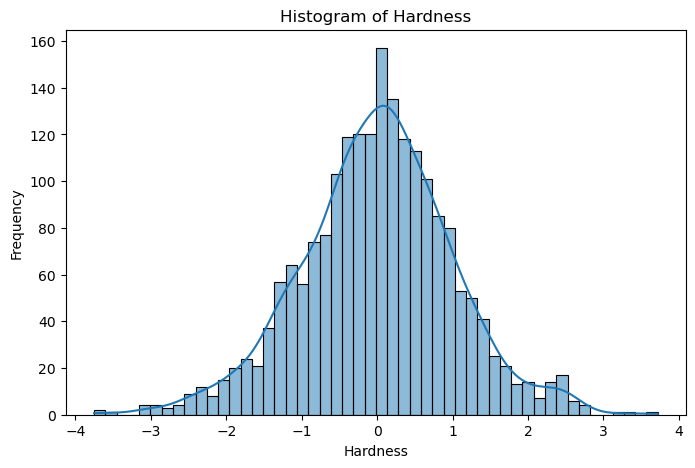

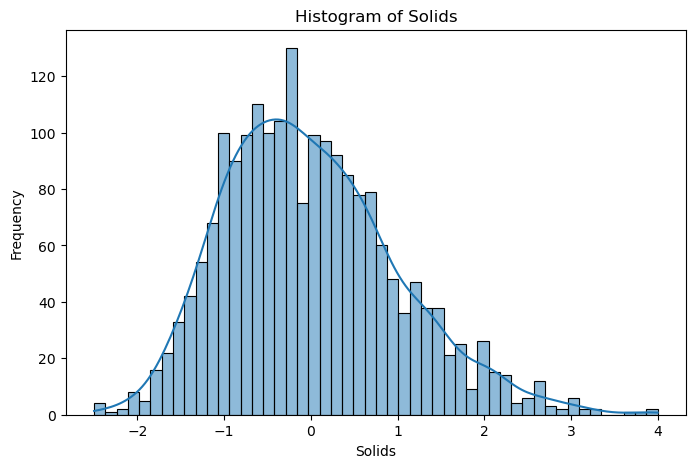

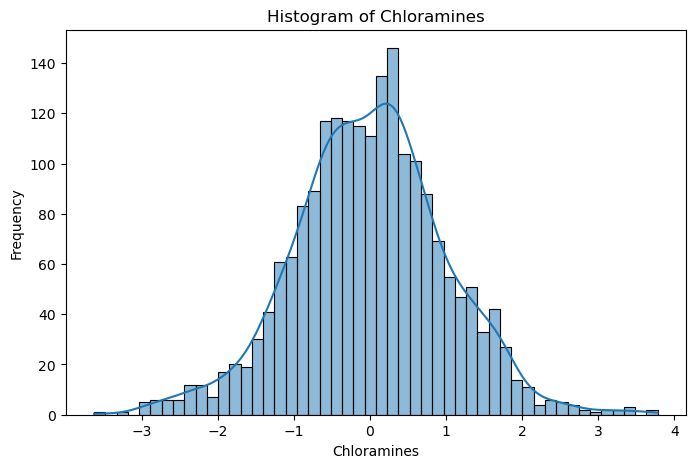

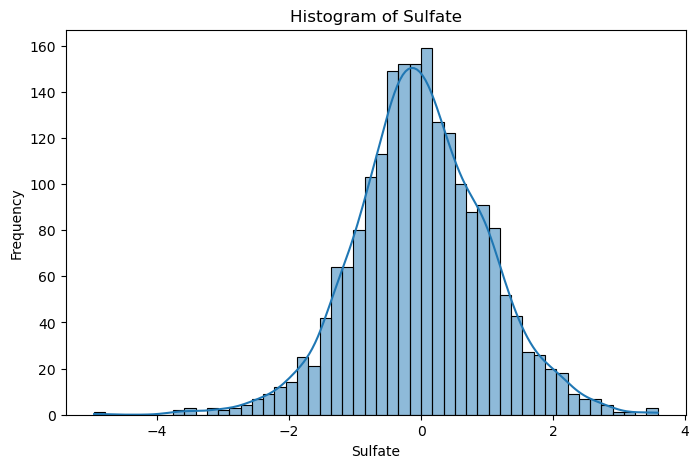

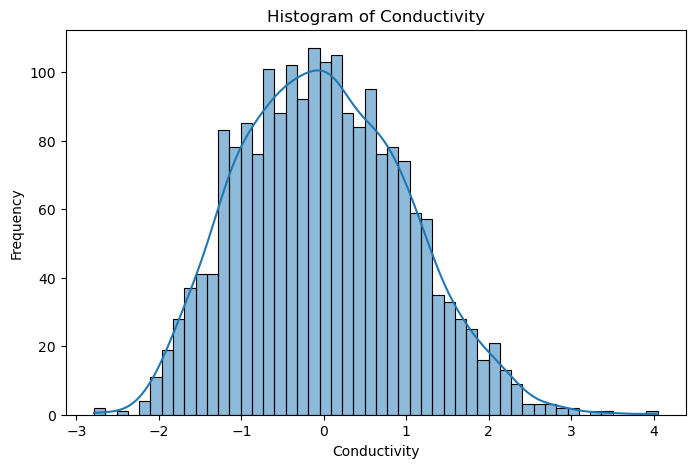

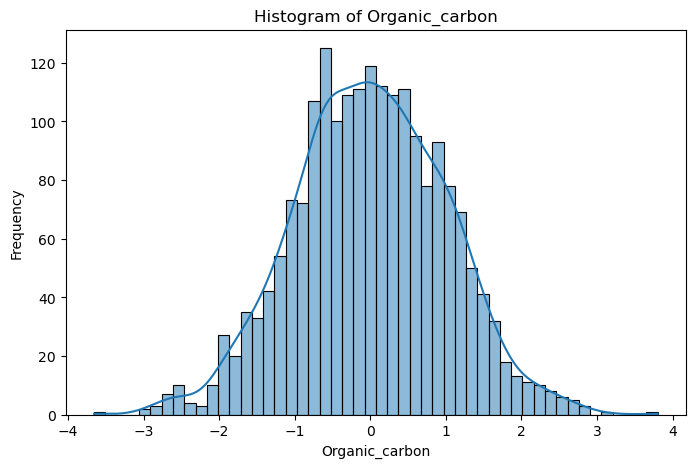

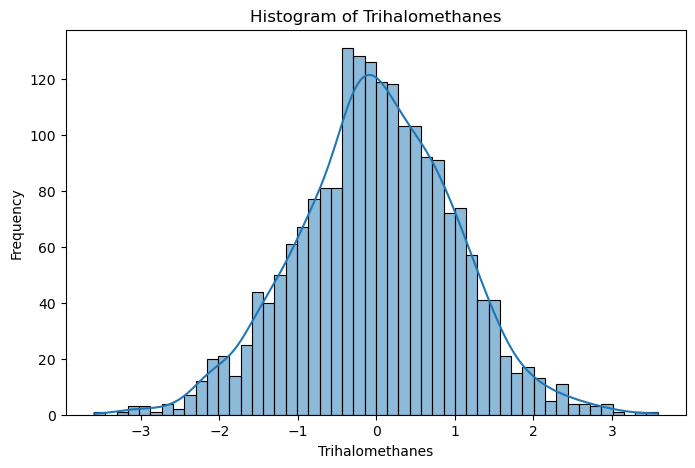

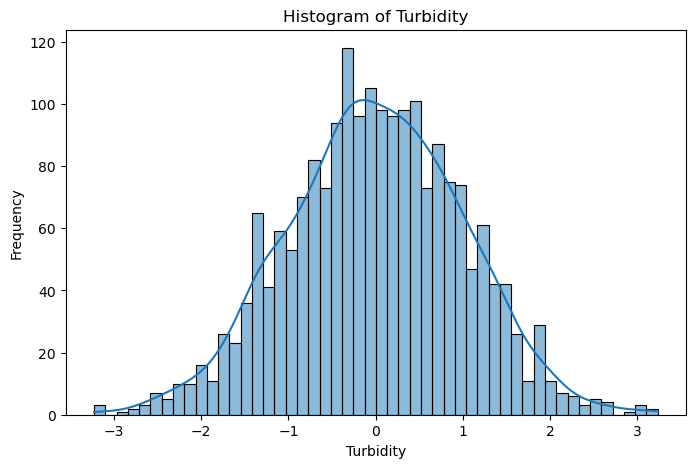

In [221]:
for col in cols_to_normalize:
    plt.figure(figsize=(8, 5))
    sns.histplot(water[col], kde=True, bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

In [222]:
for col in cols_to_normalize:
    water=water[(water[col]<3) & (water[col]>-3)]

In [223]:
water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               1929 non-null   float64
 1   Hardness         1929 non-null   float64
 2   Solids           1929 non-null   float64
 3   Chloramines      1929 non-null   float64
 4   Sulfate          1929 non-null   float64
 5   Conductivity     1929 non-null   float64
 6   Organic_carbon   1929 non-null   float64
 7   Trihalomethanes  1929 non-null   float64
 8   Turbidity        1929 non-null   float64
 9   Potability       1929 non-null   Float64
dtypes: Float64(1), float64(9)
memory usage: 167.7 KB


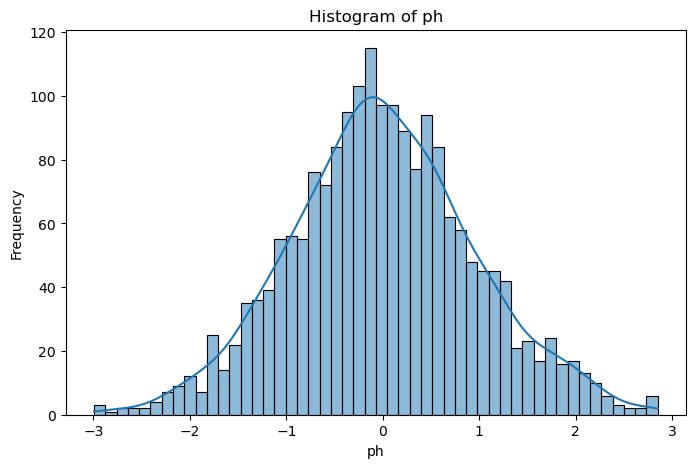

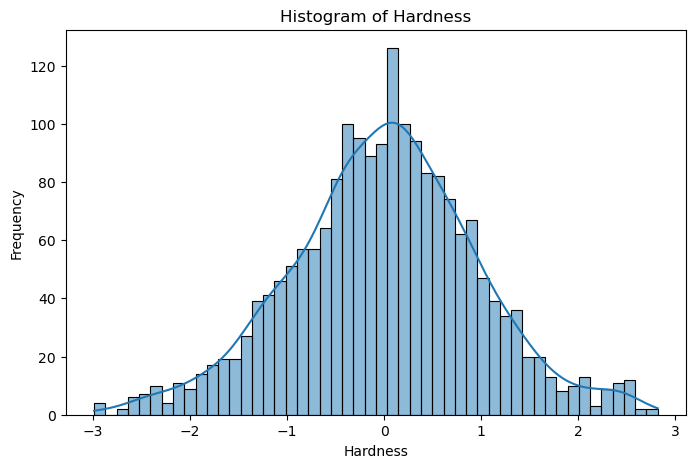

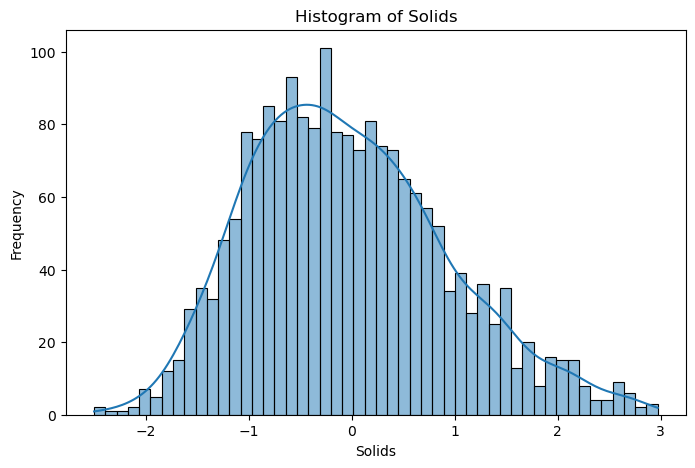

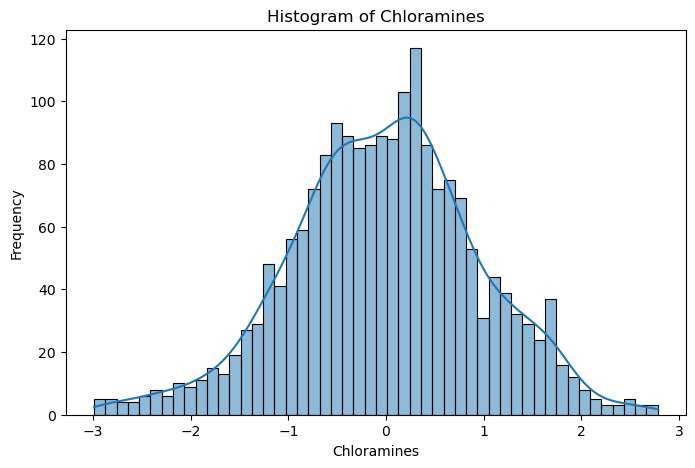

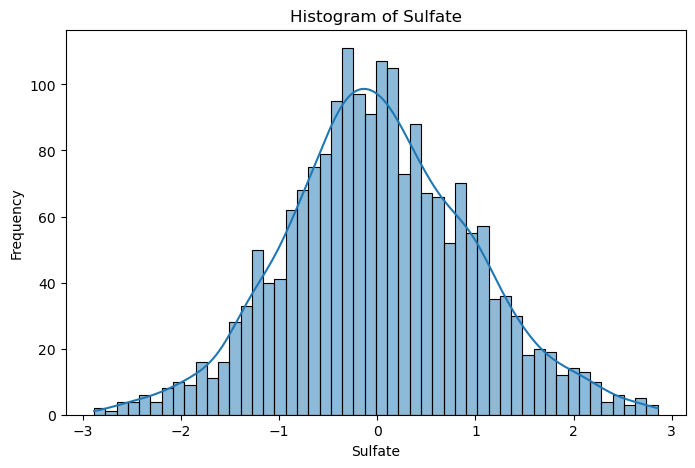

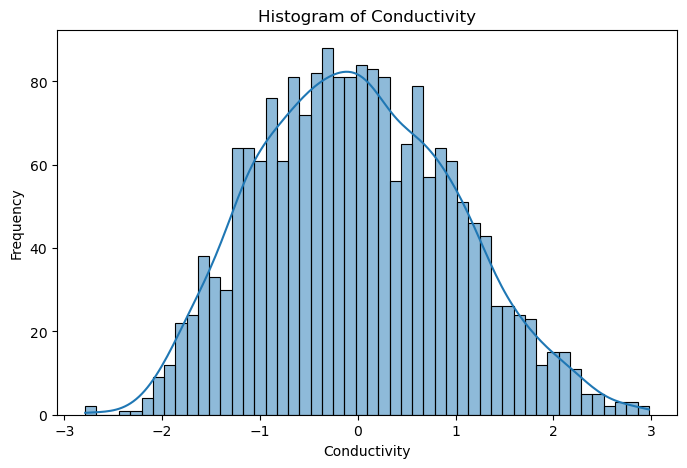

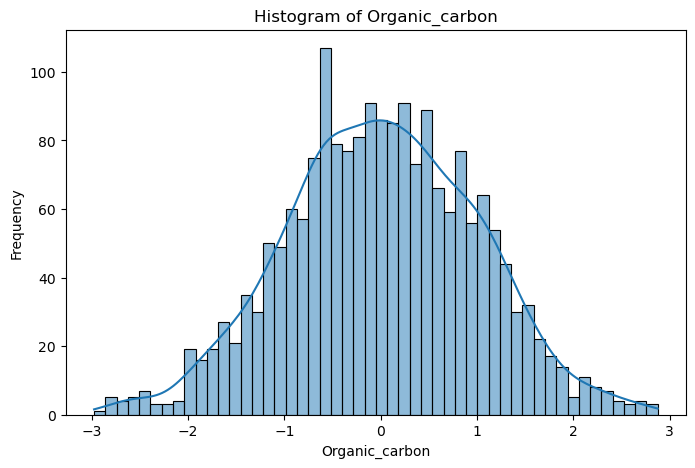

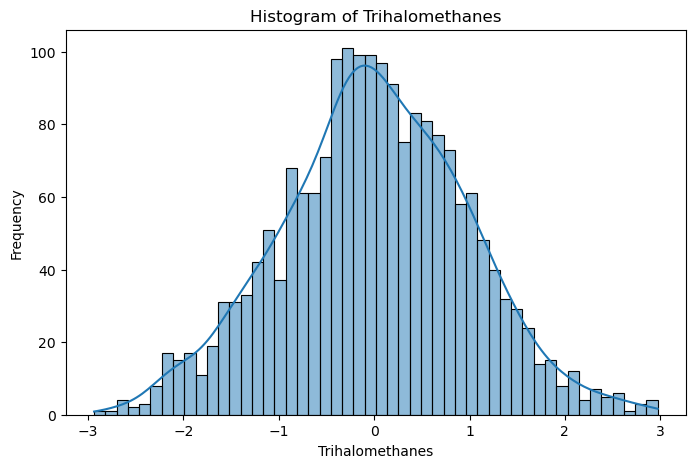

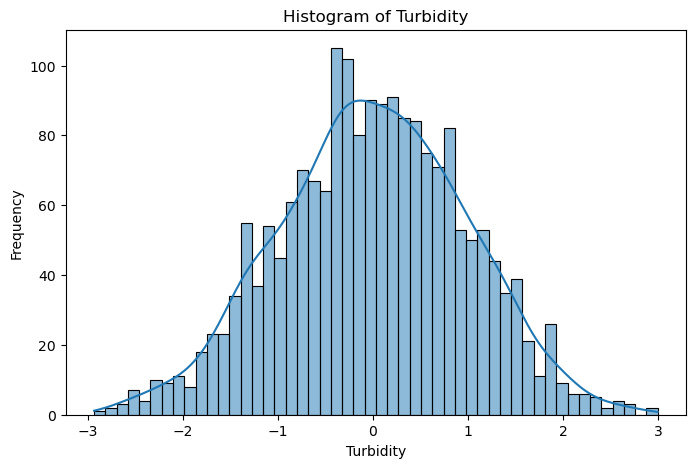

In [224]:
for col in cols_to_normalize:
    plt.figure(figsize=(8, 5))
    sns.histplot(water[col],kde=True, bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

In [225]:
water['Potability'].value_counts()

0.0    1165
1.0     764
Name: Potability, dtype: Int64

In [226]:
water_0 = water[water['Potability']==0].sample(frac=0.5)
water_1 = water[water['Potability']==1].sample(frac=0.5)
new_water = pd.concat([water_0, water_1], ignore_index=True)

In [227]:
imbalance_ratio=water[water['Potability']==0].Potability.count()/water[water['Potability']==1].Potability.count()
imbalance_ratio

1.524869109947644

In [228]:
corr_matrix=water.drop('Potability',axis=1).corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.138310,-0.093324,-0.050192,-0.000349,0.016418,0.025933,0.018798,-0.028807
Hardness,0.138310,1.000000,-0.050457,-0.019849,-0.090812,0.007579,0.015139,-0.025205,-0.038688
Solids,-0.093324,-0.050457,1.000000,-0.058827,-0.125440,0.001761,0.008885,-0.030260,0.021284
Chloramines,-0.050192,-0.019849,-0.058827,1.000000,0.013929,-0.030587,-0.013131,0.013413,0.018808
Sulfate,-0.000349,-0.090812,-0.125440,0.013929,1.000000,-0.010740,0.014590,-0.022296,0.002463
Conductivity,0.016418,0.007579,0.001761,-0.030587,-0.010740,1.000000,0.010730,0.003589,0.005790
Organic_carbon,0.025933,0.015139,0.008885,-0.013131,0.014590,0.010730,1.000000,-0.009594,-0.013116
Trihalomethanes,0.018798,-0.025205,-0.030260,0.013413,-0.022296,0.003589,-0.009594,1.000000,-0.015714
Turbidity,-0.028807,-0.038688,0.021284,0.018808,0.002463,0.005790,-0.013116,-0.015714,1.000000


<AxesSubplot: >

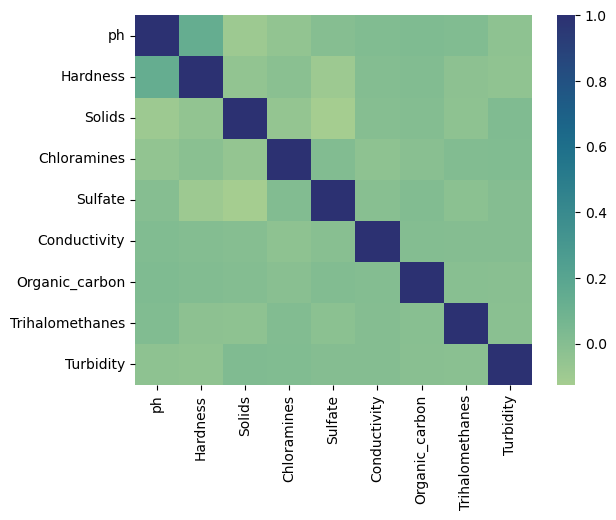

In [229]:
sns.heatmap(corr_matrix,cmap='crest')

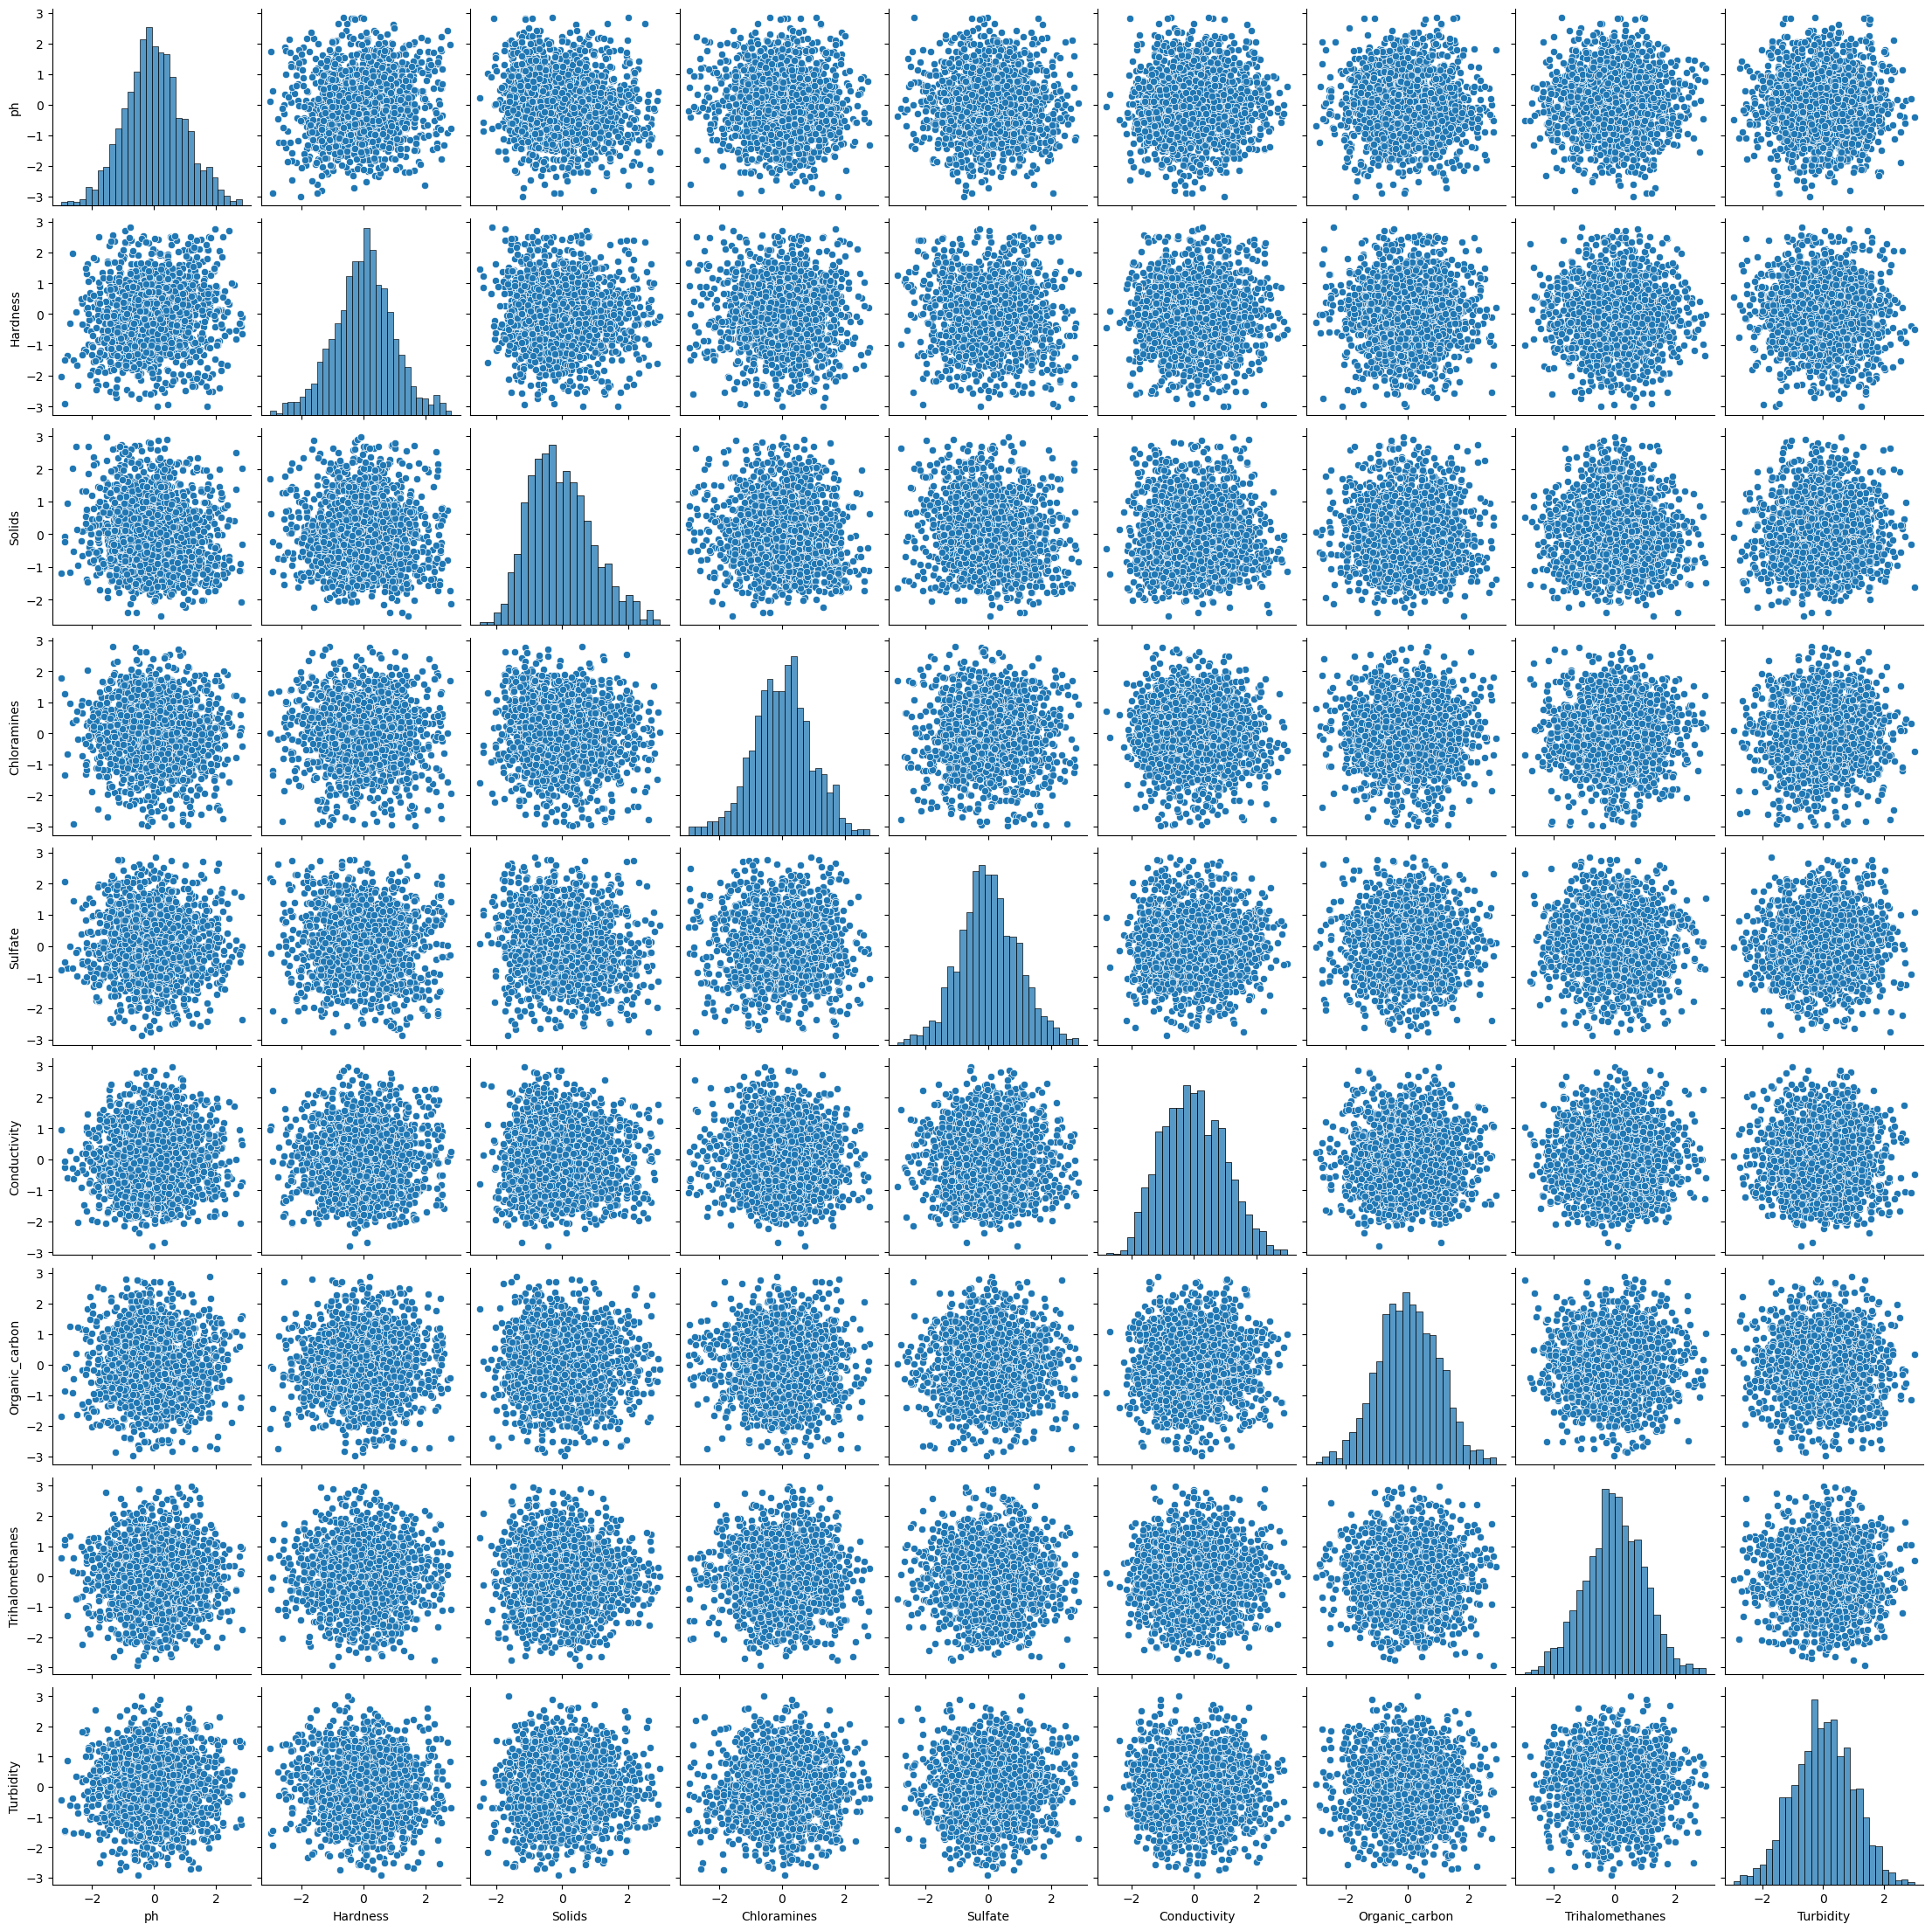

In [230]:
scatter_data = water.drop('Potability', axis=1)

sns.pairplot(scatter_data)

In [231]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

X_train = water[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y_train = water['Potability']

rfc.fit(X_train, y_train)

importances = rfc.feature_importances_

feature_importances = dict(zip(X_train.columns, importances))

sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_features:
    print(feature, importance)

Sulfate 0.1469723547411767
ph 0.1431165921203218
Hardness 0.11916961635167525
Chloramines 0.11147054968472585
Solids 0.1103566082314592
Organic_carbon 0.09470191872819758
Trihalomethanes 0.09349002496911173
Conductivity 0.09179421363794299
Turbidity 0.08892812153538904


In [232]:
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression classifier
lr = LogisticRegression()

# Fit the model on your data
lr.fit(X_train, y_train)

# Get the coefficients
coef = lr.coef_[0]

# Create a dictionary of feature names and their coefficient scores
feature_coefs = dict(zip(X_train.columns, coef))

# Sort the features by coefficient in descending order
sorted_features = sorted(feature_coefs.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the sorted feature list
for feature, coef in sorted_features:
    print(feature, coef)

Solids 0.07597241760860533
Turbidity 0.06392866395889174
Hardness 0.02815647344385853
Trihalomethanes 0.027965721334141533
Conductivity -0.02331988035577526
Sulfate 0.02312333211653635
ph 0.016237312633708836
Chloramines 0.015919202243537406
Organic_carbon -0.006710157325139141
